In [1]:
import os
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
from sahi.utils.yolov8 import (
    download_yolov8s_model, download_yolov8s_seg_model
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image as IPImage

In [2]:
test = "./test_images"

In [3]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path="./runs/segment/train22/weights/best.pt",
    confidence_threshold=0.7,
    device="cuda:0",
)

/home/p.kuznetsov/runaway/venv/lib/python3.9/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='c

In [4]:
images = []
for subdirectory in os.listdir(test):
    sub_path = os.path.join(test, subdirectory)
    for date in os.listdir(sub_path):
        date_path = os.path.join(sub_path, date)
        for file in os.listdir(date_path):
            if file.endswith(".png"):
                file_path = os.path.join(date_path, file)
                images.append(file_path)

In [5]:
for path in images[11:12]:
    cropped_images = []
    image = Image.open(path)
    img_width, img_height = image.size
    chunk_size = 200
    for top in range(0, img_height, chunk_size):
        for left in range(0, img_width, chunk_size):
            right = min(left + chunk_size, img_width)
            bottom = min(top + chunk_size, img_height)
            
            cropped_image = image.crop((left, top, right, bottom))
            cropped_images.append(cropped_image)
    result = get_sliced_prediction(
        path,
        detection_model,
        slice_height = 200,
        slice_width = 200,
        overlap_height_ratio = 0.2,
        overlap_width_ratio = 0.2
    )
    result.export_visuals(export_dir=f"./results")

    # for i, r in enumerate(results):
    #     if r.boxes.conf.tolist() == [] or r.boxes[0].conf < 0.7:
    #         continue

    #     im_bgr = r.plot()
    #     im_rgb = Image.fromarray(im_bgr[..., ::-1])

    #     display(im_rgb)
    break

Performing prediction on 100 slices.


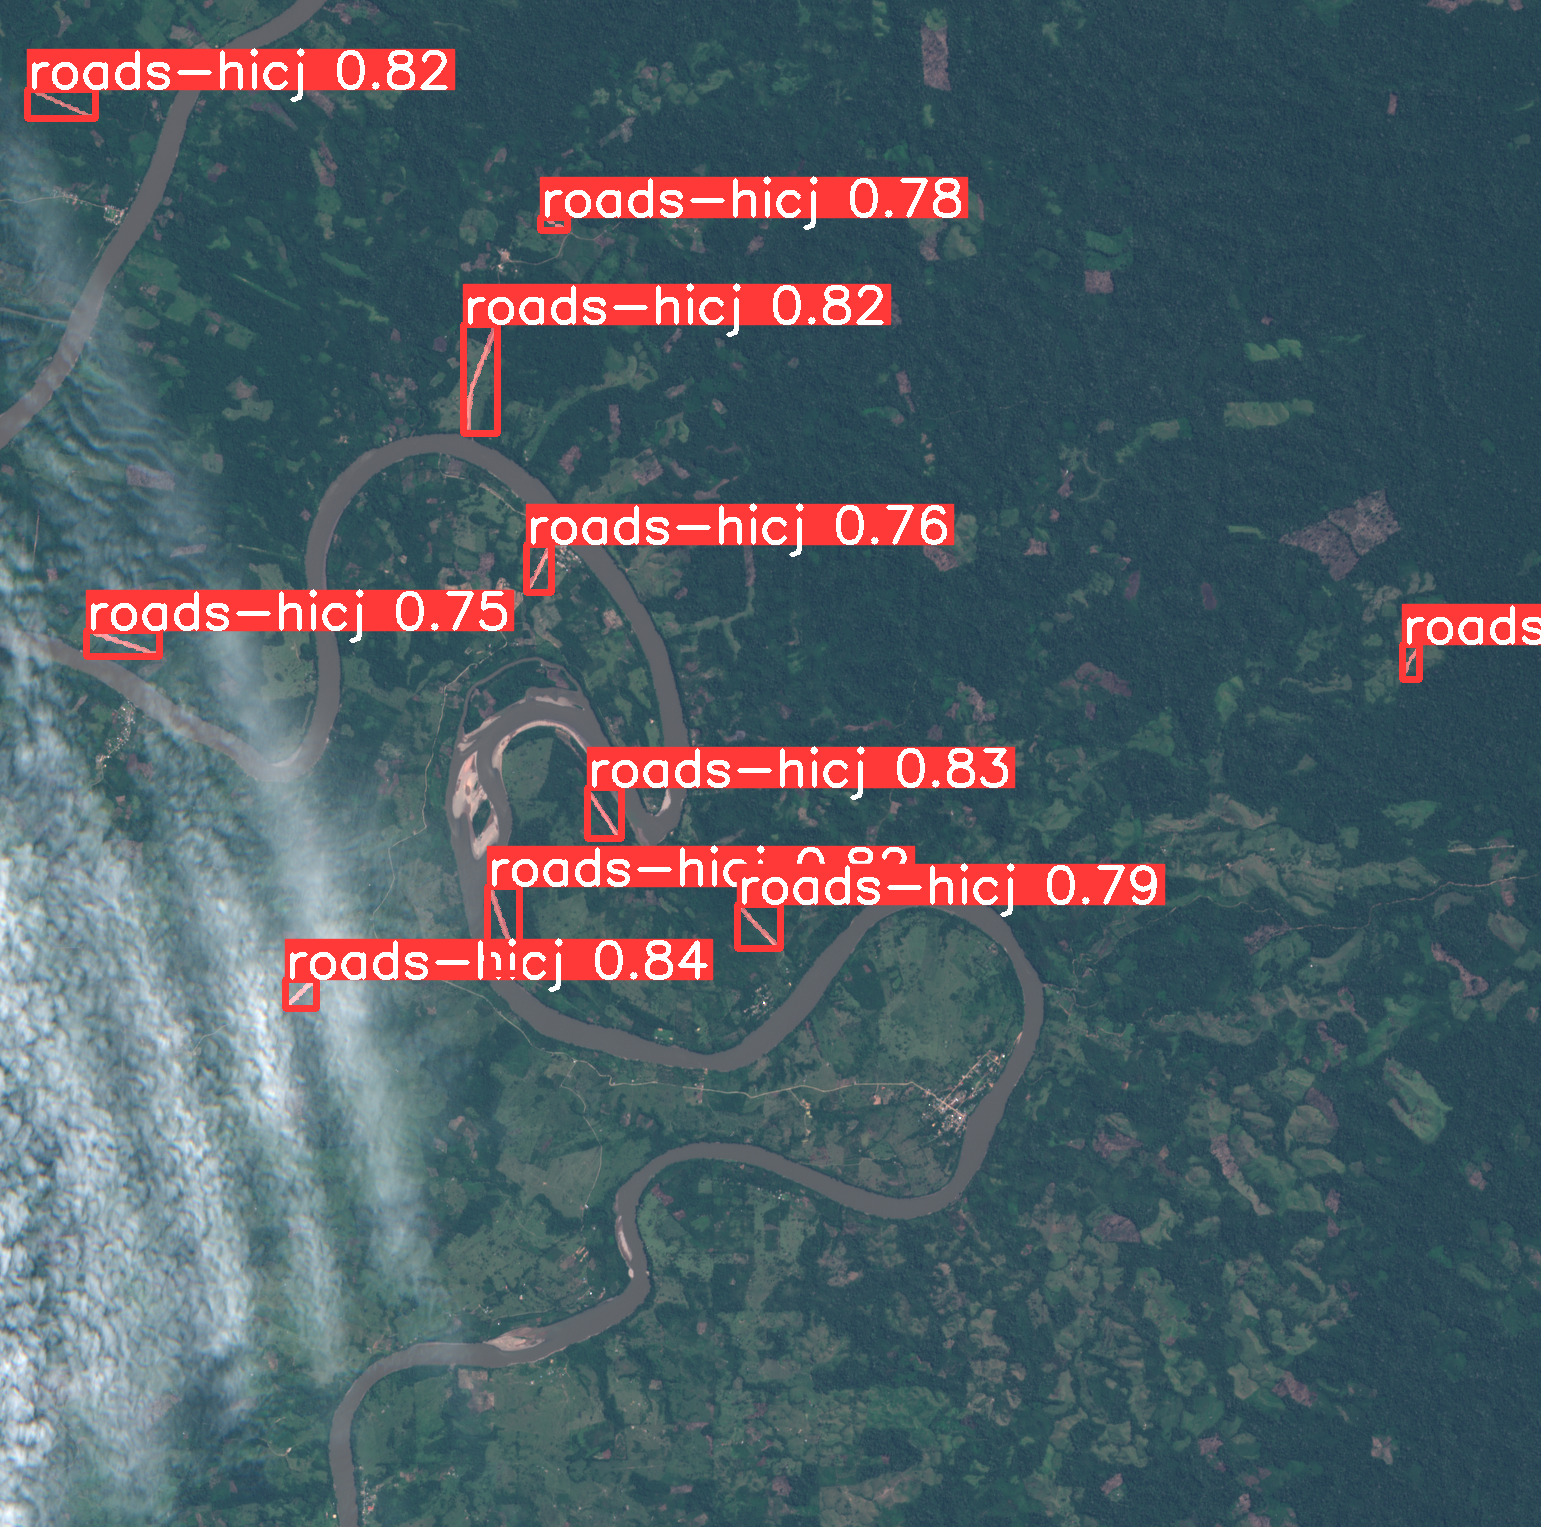

In [6]:
IPImage("./results/prediction_visual.png")